# Pymaceuticals Inc.
---

### Analysis

Upon analysis of the data the weight of the observed mouse increased. as the age of tumor increases. More male mouse were tested. Capomulin was the most used drug.
 

In [ ]:
%matplotlib notebook

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("./data/Mouse_metadata.csv")
study_results = pd.read_csv("./data/Study_results.csv")

study_results.head()

# Combine the data into a single DataFrame
#Merge the mouse data and study resultls
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_number = combined_data["Mouse ID"].nunique()

mice_number

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Find duplicate mice based on Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Print the duplicate mice
print("Duplicate mice:")
print(duplicate_mice["Mouse ID"].unique())

Duplicate mice:
['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Retrieve all data for the duplicate mouse ID
duplicate_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice["Mouse ID"].unique())]

# Print the data for the duplicate mouse ID
duplicate_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Drop the duplicate mouse entries by ID
clean_data = clean_data = combined_data[combined_data["Mouse ID"] != 'g989']

# Print the clean DataFrame
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
clean_mice_number = clean_data["Mouse ID"].nunique()

clean_mice_number

248

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_number = clean_data["Mouse ID"].nunique()

clean_mice_number

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Group the clean DataFrame by drug regimen
grouped_data = clean_data.groupby('Drug Regimen')

# Calculate summary statistics for tumor volume
summary_stats = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Display the summary DataFrame
summary_stats.head()


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Group the clean DataFrame by drug regimen and calculate summary statistics in a single line
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('variance', 'var'),
    ('standard deviation', 'std'),
    ('SEM', 'sem')
])

# Display the summary DataFrame
summary_stats.head()


,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

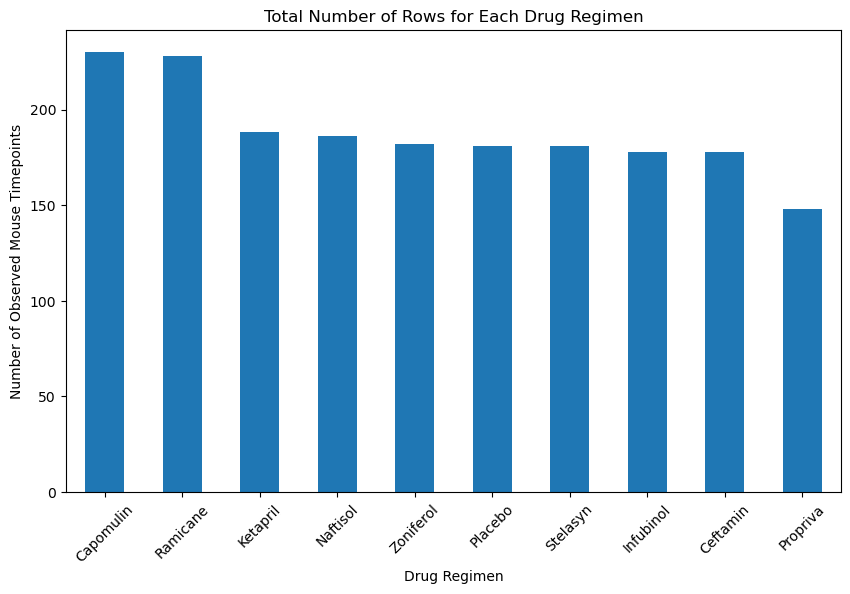

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows for each drug regimen
# Count the number of rows for each drug regimen
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Create a bar plot using pandas
regimen_counts.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()





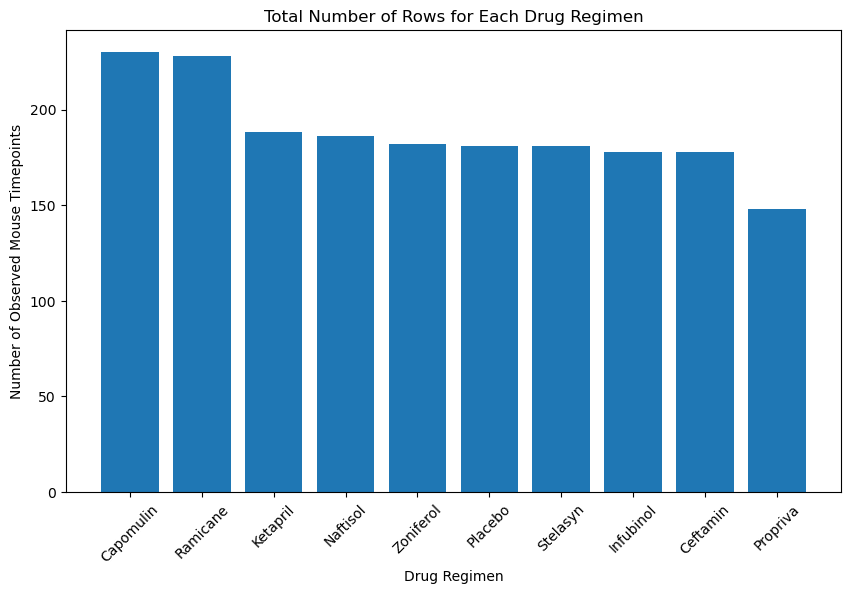

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Count the number of rows for each drug regimen
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()


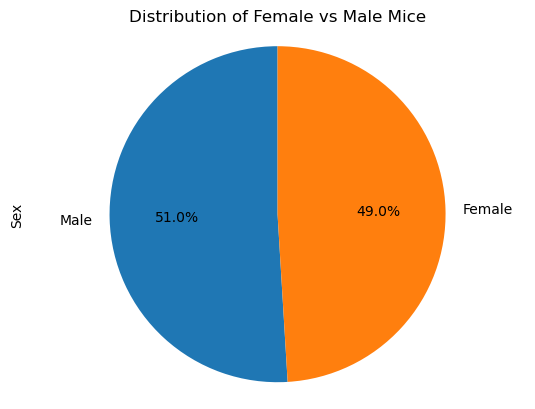

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of female and male mice
gender_counts = clean_data['Sex'].value_counts()

# Create a pie plot using pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.axis('equal')
plt.show()


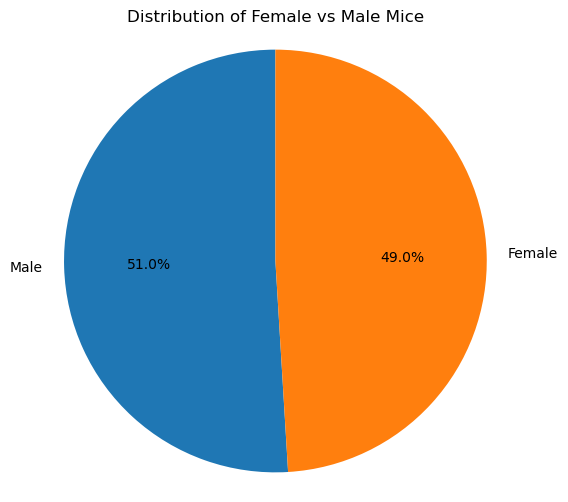

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the number of female and male mice
gender_counts = clean_data['Sex'].value_counts()

# Create a pie plot using pyplot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Select the treatment regimens of interest
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the data for the selected treatment regimens
filtered_data = clean_data[clean_data['Drug Regimen'].isin(selected_regimens)]

# Group the data by Mouse ID and find the last (maximum) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Merge with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, filtered_data, on=['Mouse ID', 'Timepoint'])

# Select the columns for final tumor volume, Mouse ID, and Drug Regimen
final_tumor_volume = final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

# Display the final tumor volume of each mouse
print(final_tumor_volume)


   Mouse ID Drug Regimen  Tumor Volume (mm3)
0      a203    Infubinol           67.973419
1      a251    Infubinol           65.525743
2      a275     Ceftamin           62.999356
3      a411     Ramicane           38.407618
4      a444     Ramicane           43.047543
..      ...          ...                 ...
95     y769     Ceftamin           68.594745
96     y793    Capomulin           31.896238
97     y865     Ceftamin           64.729837
98     z578     Ramicane           30.638696
99     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    # Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = clean_data.loc[clean_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to tumor_volume_data
    tumor_volume_data.append(treatment_data)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print information about potential outliers
    print(f"Potential outliers for {treatment}: {outliers}")



Potential outliers for Capomulin: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ramicane: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Infubinol: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


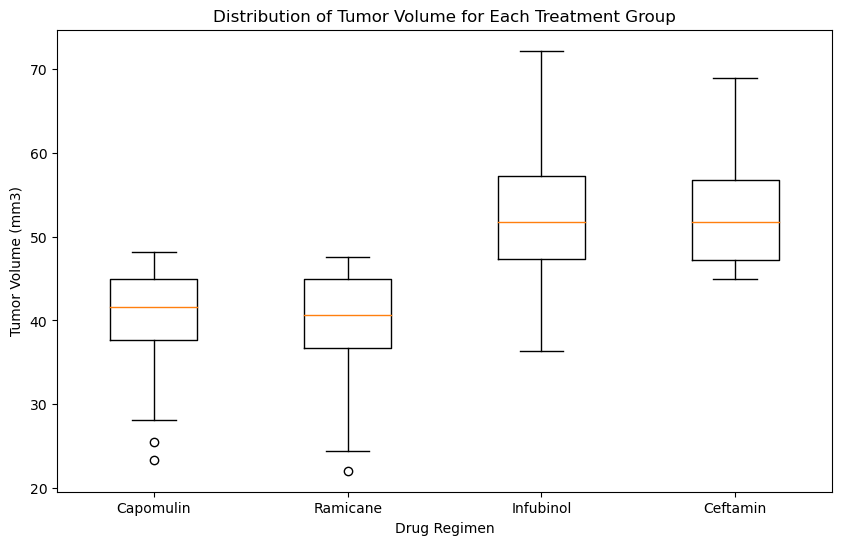

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


# Create a list of tumor volume data for each treatment group
tumor_volume_data = []
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for treatment in treatments:
    treatment_data = clean_data.loc[clean_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume_data.append(treatment_data)

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Display the plot
plt.show()


## Line and Scatter Plots

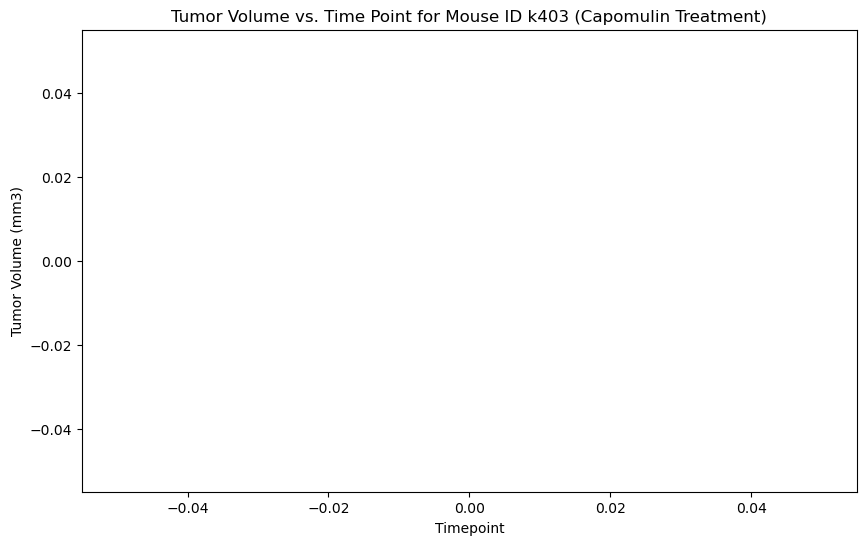

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choose a specific mouse ID treated with Capomulin
mouse_id = 'k403'

# Filter the data for the selected mouse ID and Capomulin treatment
selected_data = clean_data.loc[(clean_data['Mouse ID'] == mouse_id) & (clean_data['Drug Regimen'] == 'Capomulin')]

# Plot the tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(selected_data['Timepoint'], selected_data['Tumor Volume (mm3)'], marker='o')

# Add labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Tumor Volume vs. Time Point for Mouse ID {mouse_id} (Capomulin Treatment)")

# Display the plot
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker='o')

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Display the plot
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


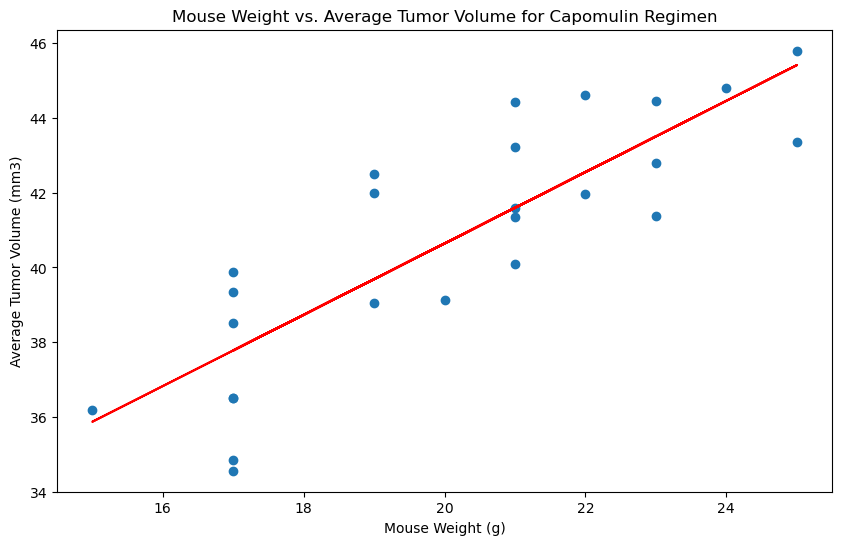

Correlation Coefficient: 0.841936342469472
Linear Regression Model: y = 0.95x + 21.55
R-squared: 0.71
P-value: 0.0000
Standard Error: 0.1275


In [18]:


# Filter the data for the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Calculate the correlation coefficient
correlation_coefficient = st.pearsonr(mouse_weight, average_tumor_volume)[0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker='o')

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Add linear regression line
plt.plot(mouse_weight, intercept + slope * mouse_weight, color='red')

# Display the plot
plt.show()

# Print correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient}")

# Print linear regression model details
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error: {std_err:.4f}")
